In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
gamers = pd.read_csv('/Users/jonathanrocha/Desktop/pullcombine.csv')
gamers


,participantId,championId,teamId,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,kills,deaths,win
0,10,63,200,False,False,False,False,False,False,1,3,False
1,10,114,200,False,False,False,False,True,True,4,2,False
2,10,145,200,False,True,False,False,True,True,2,1,True
3,10,117,200,True,False,False,False,False,False,0,8,False
4,10,777,200,True,True,True,False,True,True,12,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...
760,10,16,200,True,False,False,False,True,False,0,5,False
761,10,54,200,True,True,True,True,False,False,10,2,True
762,10,876,200,True,True,False,False,True,False,4,6,False
763,10,50,200,True,False,False,False,True,False,13,3,True


In [3]:
gamers["win"]=gamers["win"].replace(False,"2")
gamers["win"]=gamers["win"].replace(True,"1")
gamers["firstBlood"]=gamers["firstBlood"].replace(False,"2")
gamers["firstBlood"]=gamers["firstBlood"].replace(True,"1")
gamers["firstTower"]=gamers["firstTower"].replace(False,"2")
gamers["firstTower"]=gamers["firstTower"].replace(True,"1")
gamers["firstInhibitor"]=gamers["firstInhibitor"].replace(False,"2")
gamers["firstInhibitor"]=gamers["firstInhibitor"].replace(True,"1")
gamers["firstBaron"]=gamers["firstBaron"].replace(False,"2")
gamers["firstBaron"]=gamers["firstBaron"].replace(True,"1")
gamers["firstDragon"]=gamers["firstDragon"].replace(False,"2")
gamers["firstDragon"]=gamers["firstDragon"].replace(True,"1")
gamers["firstRiftHerald"]=gamers["firstRiftHerald"].replace(False,"2")
gamers["firstRiftHerald"]=gamers["firstRiftHerald"].replace(True,"1")
gamers.head()

,participantId,championId,teamId,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,kills,deaths,win
0,10,63,200,2,2,2,2,2,2,1,3,2
1,10,114,200,2,2,2,2,1,1,4,2,2
2,10,145,200,2,1,2,2,1,1,2,1,1
3,10,117,200,1,2,2,2,2,2,0,8,2
4,10,777,200,1,1,1,2,1,1,12,3,1


In [4]:
gamersdf=gamers.drop(columns=['participantId','teamId'])
gamersdf.head()

,championId,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,kills,deaths,win
0,63,2,2,2,2,2,2,1,3,2
1,114,2,2,2,2,1,1,4,2,2
2,145,2,1,2,2,1,1,2,1,1
3,117,1,2,2,2,2,2,0,8,2
4,777,1,1,1,2,1,1,12,3,1


In [51]:
gamersdf1=gamers.drop(columns=['championId'])
gamersdf1.head()

,participantId,teamId,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,kills,deaths,win
0,10,200,2,2,2,2,2,2,1,3,2
1,10,200,2,2,2,2,1,1,4,2,2
2,10,200,2,1,2,2,1,1,2,1,1
3,10,200,1,2,2,2,2,2,0,8,2
4,10,200,1,1,1,2,1,1,12,3,1


In [5]:
# Assign X (data) and y (target)
X = gamers.drop("win", axis=1)
y = gamers["win"]
print(X.shape, y.shape)

(765, 11) (765,)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

Create a Logistic Regression Model

In [7]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Fit (train) or model using the training data

In [8]:
classifier.fit(X_train, y_train)

/Users/jonathanrocha/opt/anaconda3/envs/main/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Validate the model using the test data

In [9]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9092495636998255
Testing Data Score: 0.8802083333333334


In [10]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['2' '1' '1' '2' '1' '2' '1' '1' '2' '1']
First 10 Actual labels: ['2', '1', '1', '2', '1', '2', '2', '1', '1', '1']


In [59]:
predict_df=pd.DataFrame({"Prediction": predictions, "Actual": y_test})
predict_df

,Prediction,Actual
357,2,2
259,1,1
751,1,2
193,2,1
333,1,1
...,...,...
73,2,2
745,1,2
300,1,1
145,2,2


In [13]:
predict_df.to_csv(r'/Users/jonathanrocha/Desktop//ClassWork/FinalGroup/Jon_Ml/Wins_championId.csv',index = True, header= True)

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.6236659284427906


In [90]:
### TREES MACHINE LEARNING

In [15]:
gamersdf.head()

,championId,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,kills,deaths,win
0,63,2,2,2,2,2,2,1,3,2
1,114,2,2,2,2,1,1,4,2,2
2,145,2,1,2,2,1,1,2,1,1
3,117,1,2,2,2,2,2,0,8,2
4,777,1,1,1,2,1,1,12,3,1


In [19]:

from sklearn import tree

In [21]:

target = gamersdf["win"]
target_names = ["loss", "win"]

In [22]:

data = gamersdf.drop("win", axis=1)

feature_names = data.columns
data.head()

,championId,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,kills,deaths
0,63,2,2,2,2,2,2,1,3
1,114,2,2,2,2,1,1,4,2
2,145,2,1,2,2,1,1,2,1
3,117,1,2,2,2,2,2,0,8
4,777,1,1,1,2,1,1,12,3


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [24]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8854166666666666

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9166666666666666

In [27]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.36877379641237296, 'firstInhibitor'),
 (0.17828028922770395, 'deaths'),
 (0.11059314462030556, 'championId'),
 (0.10440144415581874, 'kills'),
 (0.09465245331198961, 'firstBaron'),
 (0.07108606121113635, 'firstTower'),
 (0.03710723796479269, 'firstDragon'),
 (0.02052661269499635, 'firstBlood'),
 (0.014578960400883858, 'firstRiftHerald')]

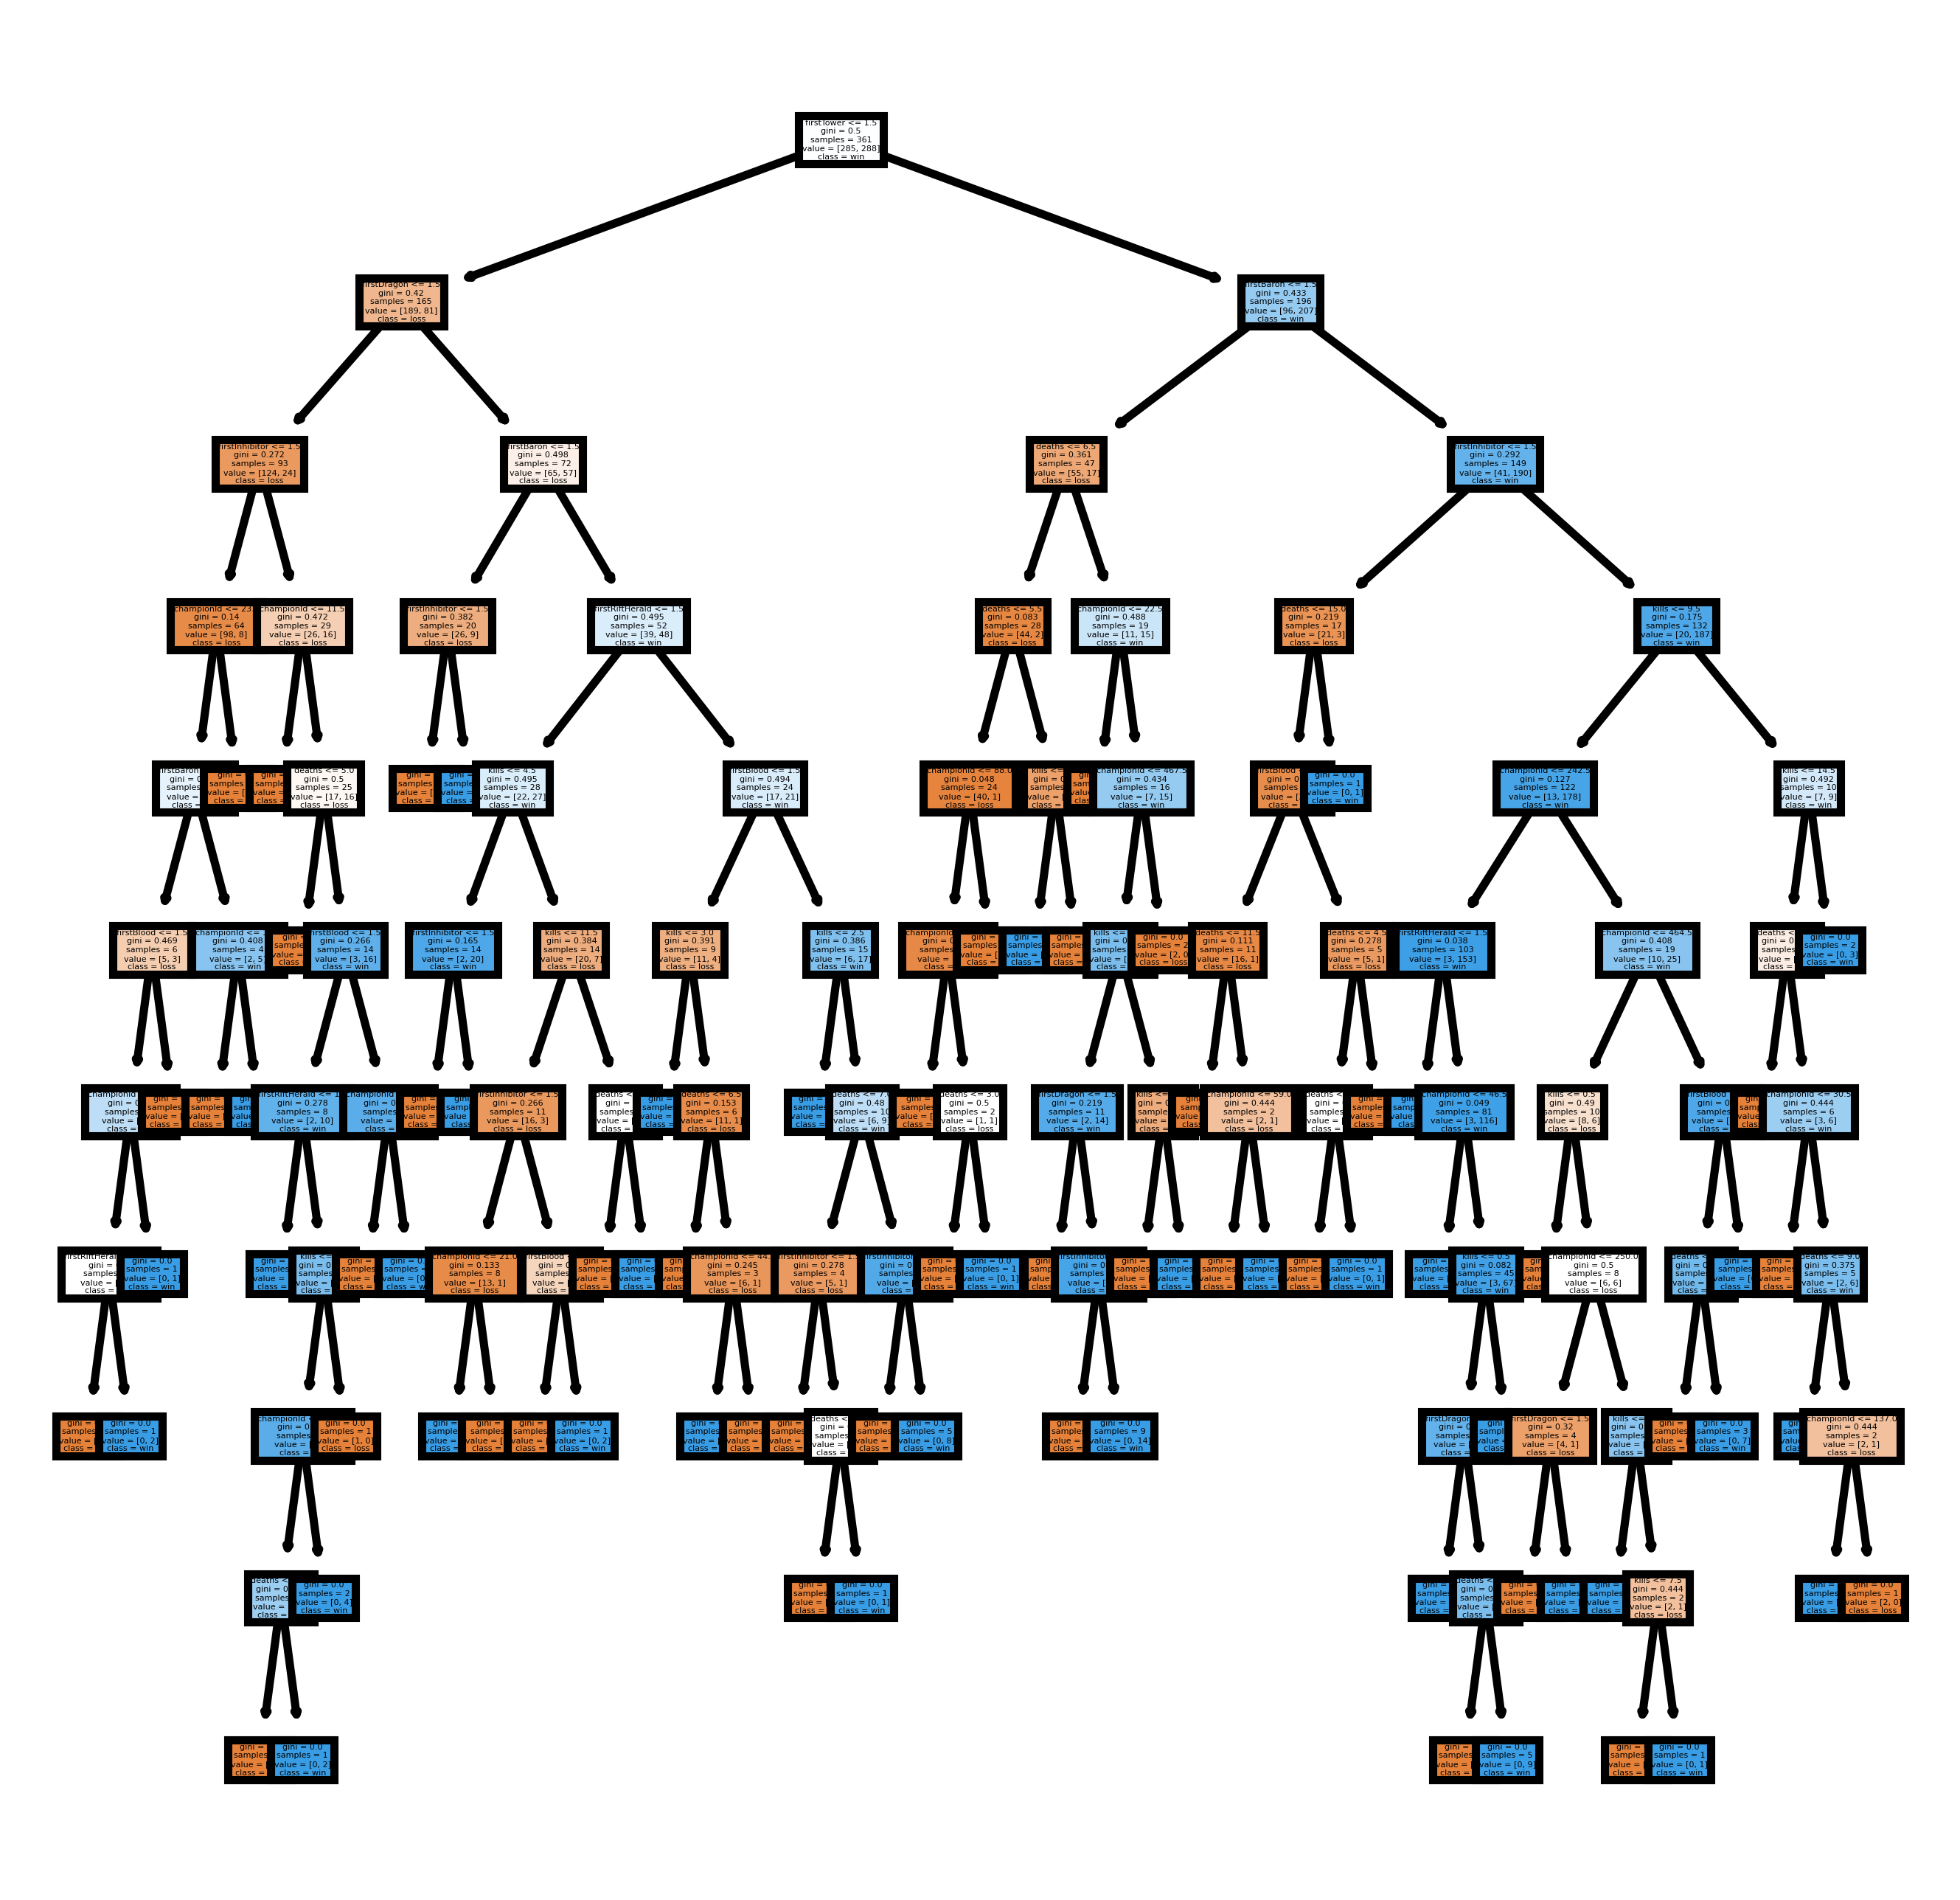

In [48]:
fn=feature_names
cn=target_names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True)
fig.savefig('rf_tree.png')

In [ ]:
## Tree without championId

In [52]:
target = gamersdf1["win"]
target_names = ["loss", "win"]

In [53]:
data = gamersdf1.drop("win", axis=1)

feature_names = data.columns
data.head()

,participantId,teamId,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,kills,deaths
0,10,200,2,2,2,2,2,2,1,3
1,10,200,2,2,2,2,1,1,4,2
2,10,200,2,1,2,2,1,1,2,1
3,10,200,1,2,2,2,2,2,0,8
4,10,200,1,1,1,2,1,1,12,3


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [55]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.890625

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9270833333333334

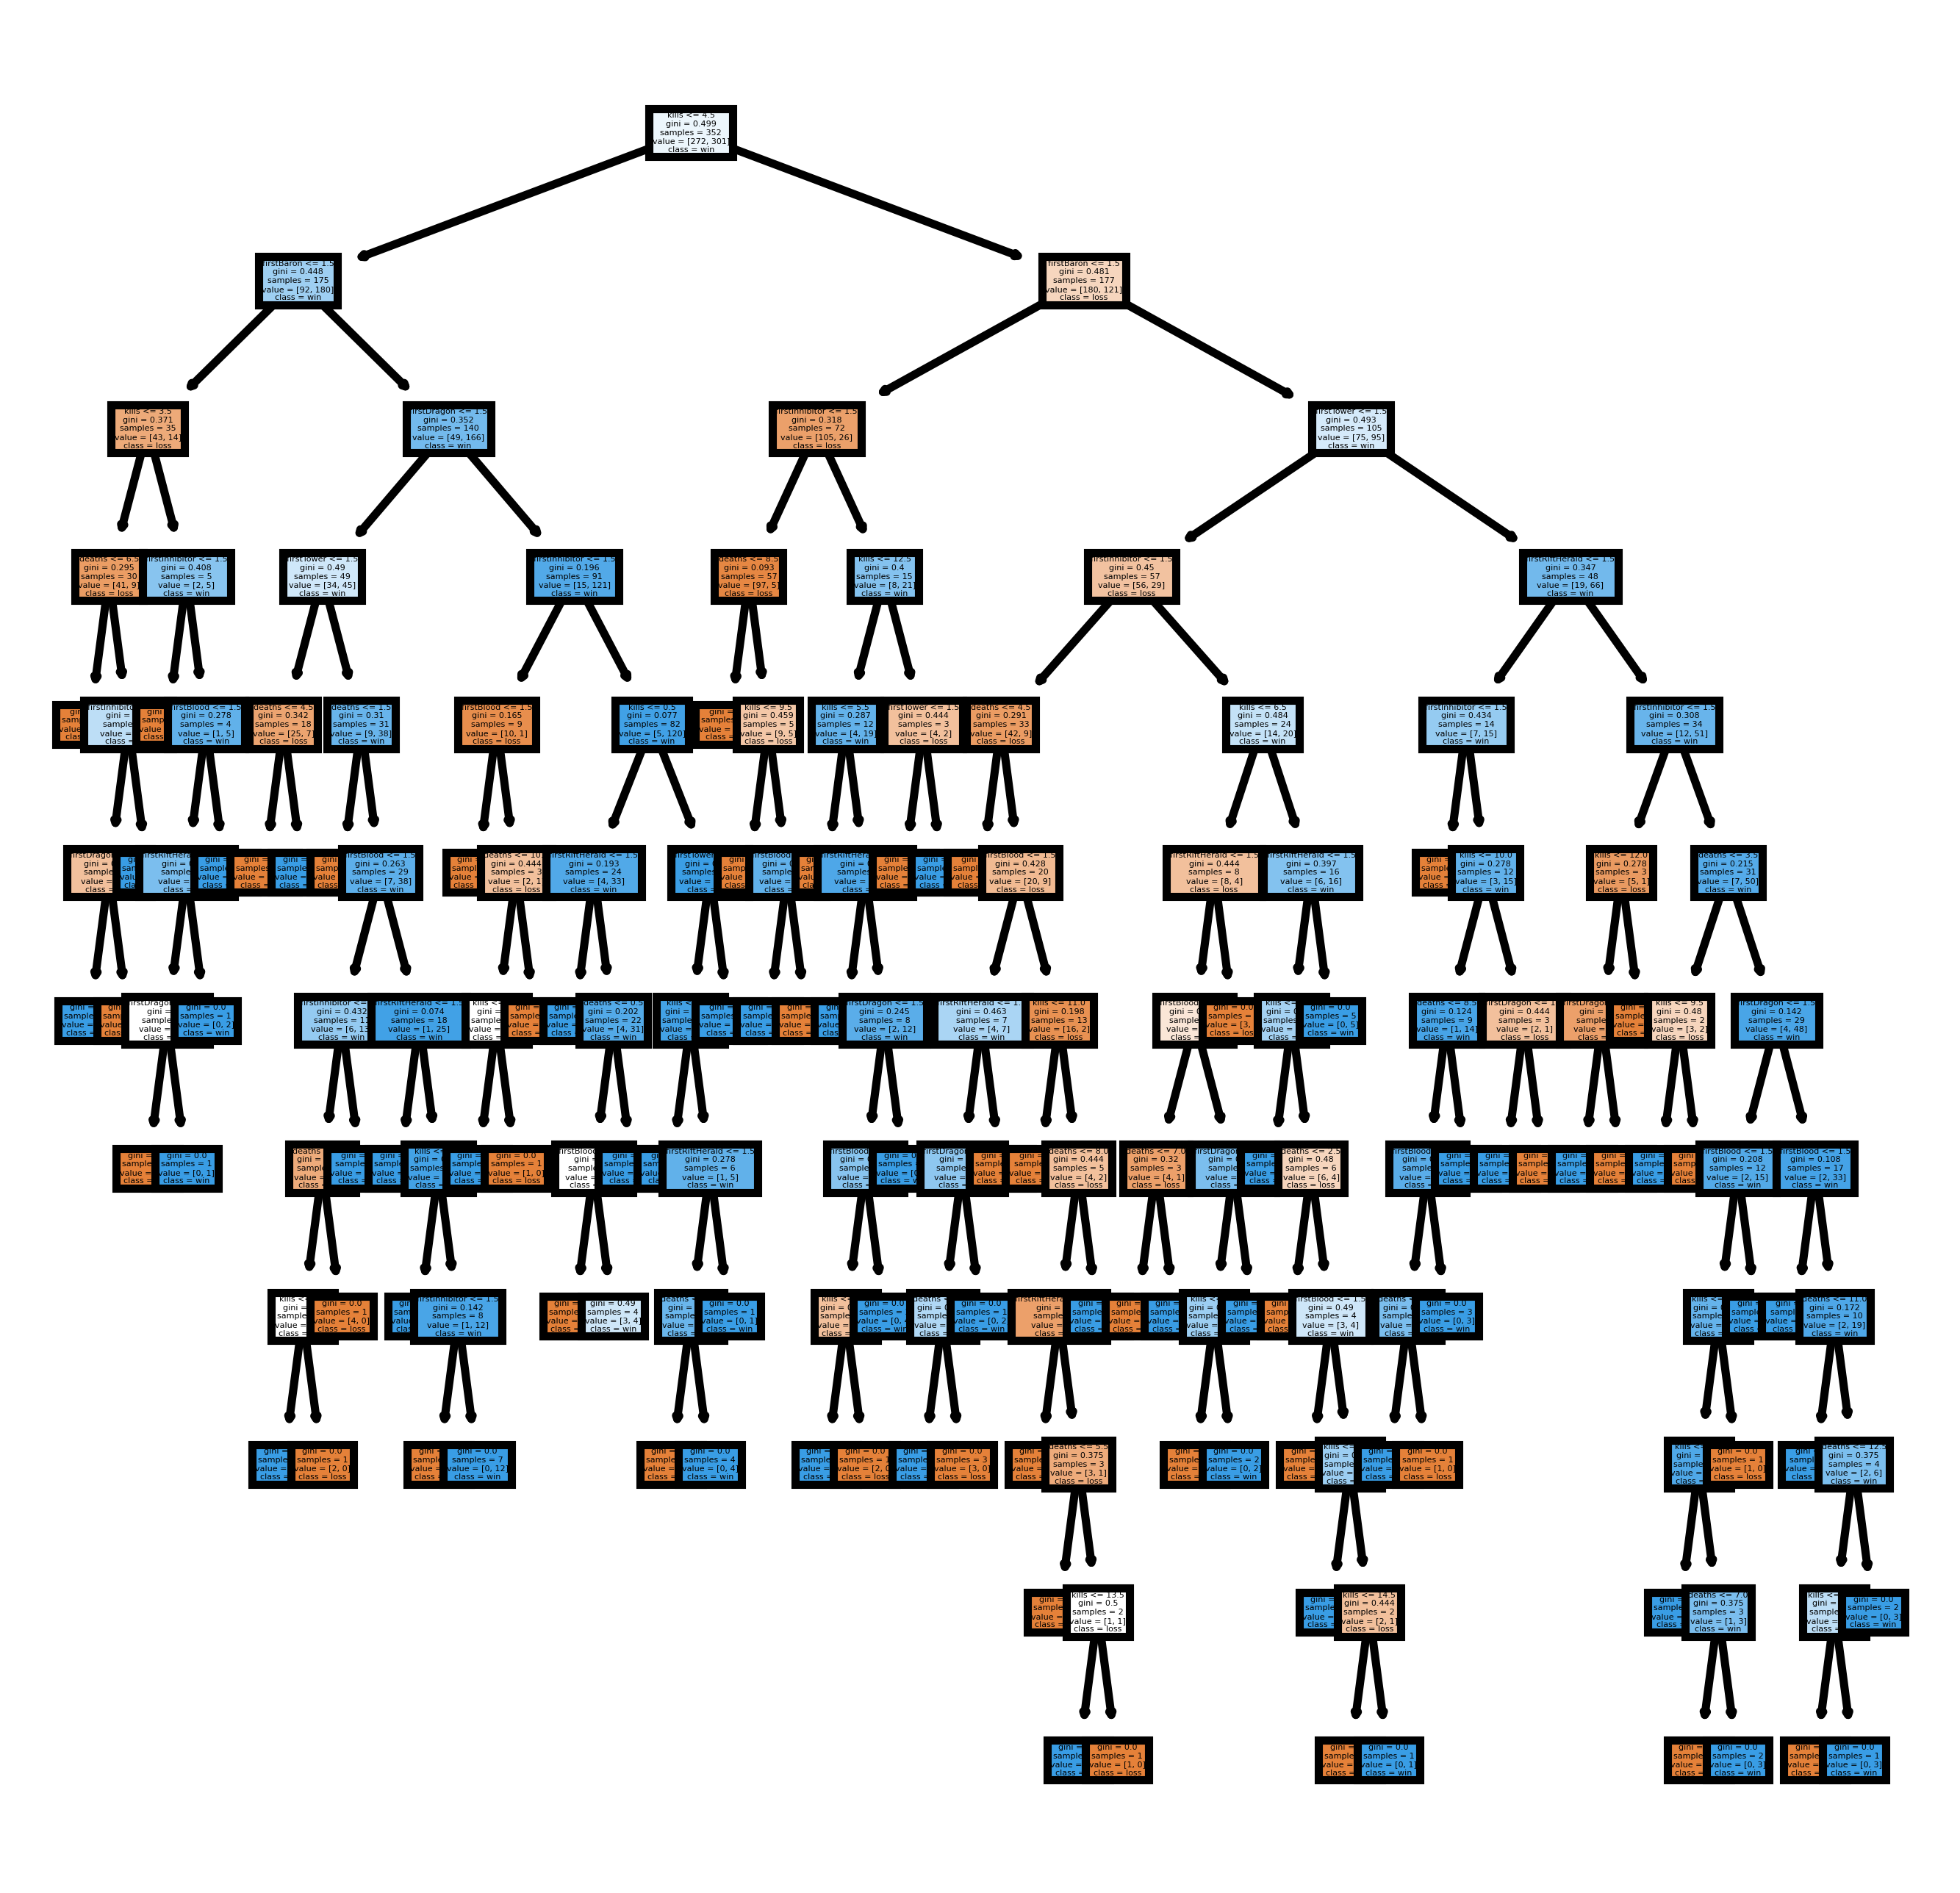

In [57]:
fn=feature_names
cn=target_names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True)
fig.savefig('rf_tree_withoutChampId.png')